<a href="https://colab.research.google.com/github/ykato27/mplfinance/blob/main/yscale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade mplfinance

Requirement already up-to-date: mplfinance in /usr/local/lib/python3.7/dist-packages (0.12.7a17)


In [2]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
%matplotlib inline
import pandas as pd

---

# Use of `yscale` kwarg in mplfinance

- kwarg `yscale` may be used in `mpf.plot()` and/or `mpf.add_plot()`
<br><br>
- function `mpf.plot()` also accepts kwarg `volume_yscale` which has the same syntax and behavior as `yscale` except that it gets applied to the Volume Axes of the plot.
<br><br>
- `yscale` may be a string, in which case it must be one of ["linear", "log", "symlog", "logit"].
<br><br>
- `yscale` may also be a dict, in which case
  - it must contain the key `yscale` whose value is one of ["linear", "log", "symlog", "logit"]
  - the remaining key/value pairs are passed as kwargs to matplotlib's [`Axes.set_yscale()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_yscale.html)
<br><br>

---

## `yscale` examples:


In [4]:
import pandas_datareader as pdr
symbols = ['SPY']
pdr =pdr.stooq.StooqDailyReader(symbols=symbols, start="2011-7-1", end="2012-6-29").read().sort_values(by='Date',ascending=True)
df = pdr[['Open','High','Low','Close','Volume']]
columns_list = df.columns.get_level_values(0)
df.columns = columns_list
df.shape
df.head(3)
df.tail(3)

(252, 5)

Attributes,Open,High,Low,Close,Volume
Date,,,,,
2011-07-01,109.23,110.92,109.00,110.76,244688433
2011-07-05,110.64,110.91,110.33,110.67,200806978
2011-07-06,110.42,110.96,110.11,110.81,173256054


Attributes,Open,High,Low,Close,Volume
Date,,,,,
2012-06-27,111.85,112.70,111.43,112.48,127834598
2012-06-28,111.73,112.32,110.90,112.17,200227943
2012-06-29,114.18,115.13,113.87,114.98,251206412


In [5]:
import mplfinance as mpf
mpf.__version__

'0.12.7a17'

---

### We can set the yscale to logarithmic for price or volume or both

- First we scale the data to a larger range, to make a 'log' plot more interesting:


In [6]:
import random

In [7]:
sdf = df[['Open','High','Low','Close']].apply(lambda x: (x-101.)*2**((x-101.)/4),axis=1)

In [8]:
v = [ 2**(x/10.) for x in range(len(df))]
sdf['Volume'] = [ random.choice(v) for ix in range(len(df)) ]

In [9]:
# Compare the original dataframe to the "scaled" one:
print('===   Original   ===')
df[['Open','High','Low','Close','Volume']].describe().loc[['max','min','std','mean','count'],:]
print('\n')
print('===   "Scaled"   ===')
sdf.describe().loc[['max','min','std','mean','count'],:]

===   Original   ===


Attributes,Open,High,Low,Close,Volume
max,119.100000,119.490000,118.550000,119.180000,8.676519e+08
min,90.065000,93.591000,89.311000,91.365000,6.778928e+07
std,7.055190,6.769687,7.350798,7.092122,1.223891e+08
mean,107.554282,108.314778,106.706262,107.562893,2.456830e+08
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02




===   "Scaled"   ===


Attributes,Open,High,Low,Close,Volume
max,416.715165,455.457718,367.321397,424.399838,3.130739e+07
min,-2.122930,-2.122776,-2.122548,-2.122589,1.000000e+00
std,96.263744,107.889483,85.765112,98.956393,4.933186e+06
mean,71.392098,82.001696,61.745530,72.758837,1.873132e+06
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02


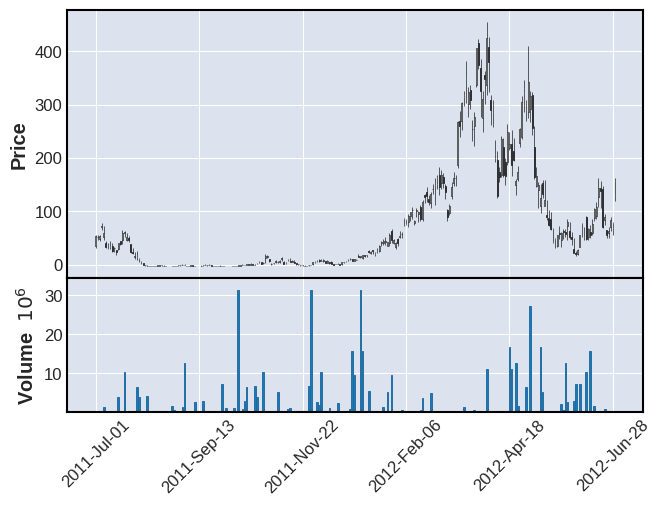

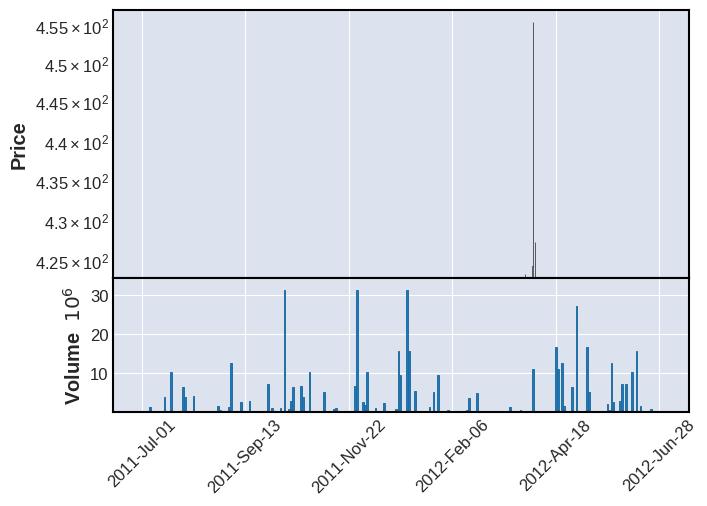

In [10]:
kw = dict(volume=True,type='candle',panel_ratios=(1,0.5))
mpf.plot(sdf,**kw)
mpf.plot(sdf,**kw,yscale='log')

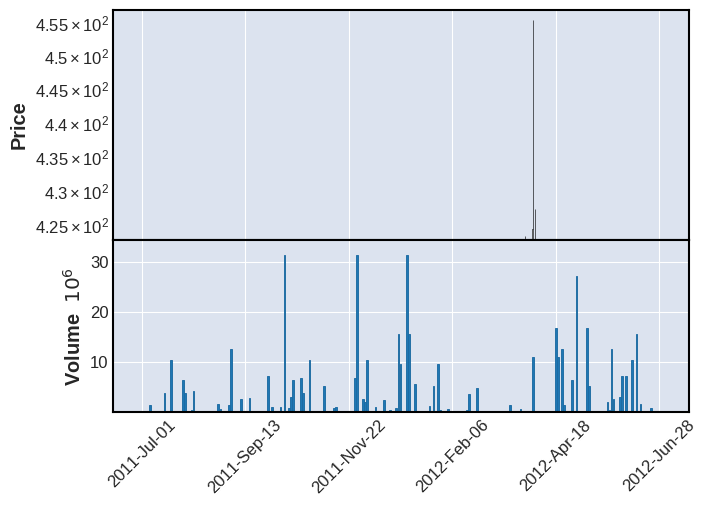

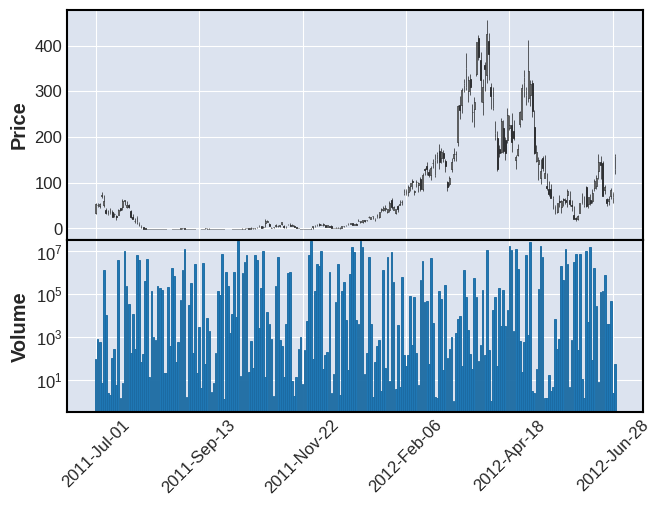

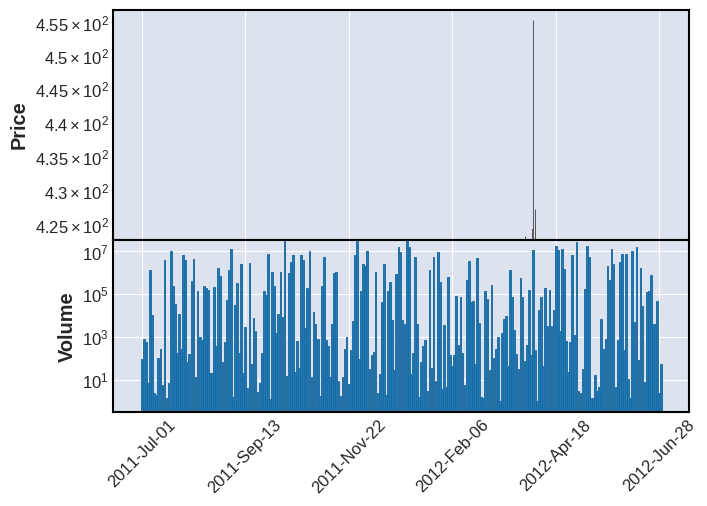

In [11]:
kw = dict(volume=True,type='candle',panel_ratios=(1,0.75))
mpf.plot(sdf,**kw,yscale='log')
mpf.plot(sdf,**kw,volume_yscale='log')
mpf.plot(sdf,**kw,yscale='log',volume_yscale='log')

---

### We can also pass `yscale` into `mpf.make_addplot()`

(first we generate some fake data, from the existing data, for the addplot)

In [12]:
# Flip the data around to make it more interesting
adata = [v for v in sdf['Close'][int(len(sdf)/2):].values]
adata.extend(sdf['Close'][0:int(len(sdf)/2)].values)

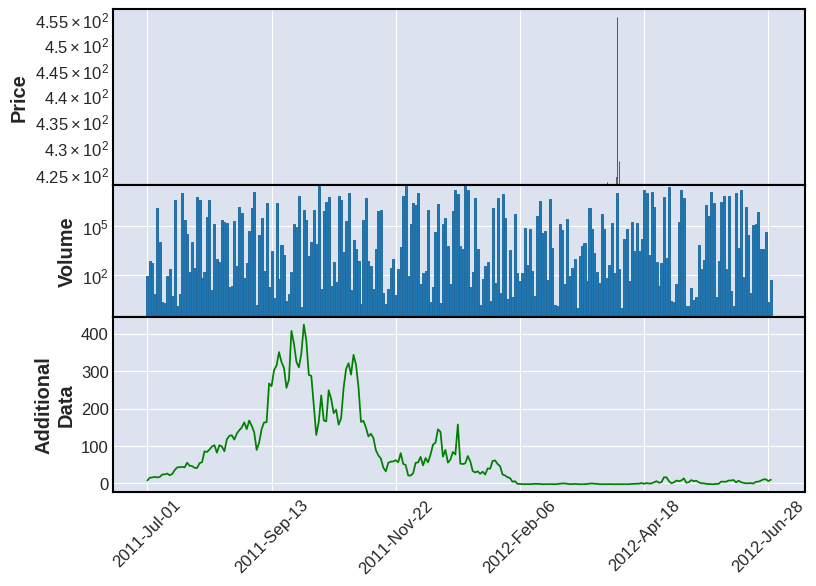

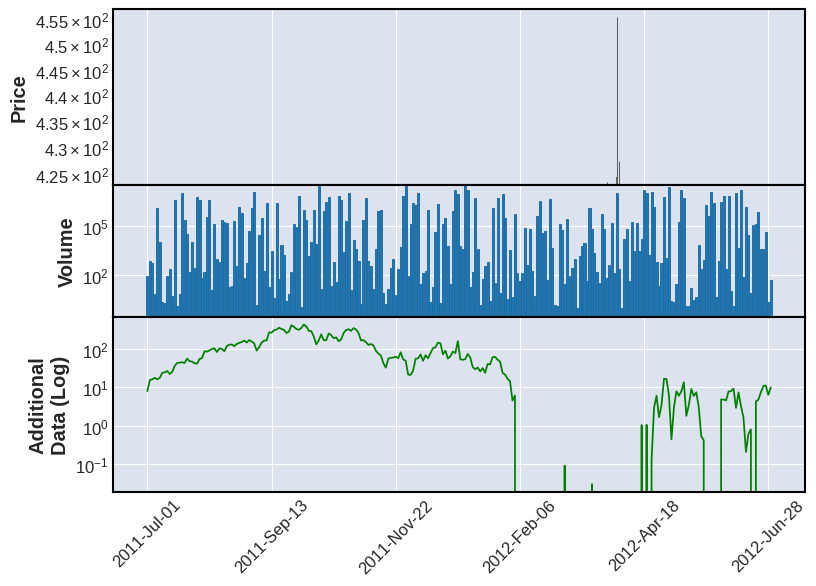

In [13]:
kw = dict(volume=True,type='candle',panel_ratios=(1,0.75,1),figscale=1.2)

ap = mpf.make_addplot(adata,panel=2,color='g',ylabel='Additional\nData')
mpf.plot(sdf,**kw,addplot=ap,yscale='log',volume_yscale='log')

ap = mpf.make_addplot(adata,panel=2,color='g',ylabel='Additional\nData (Log)',yscale='log')
mpf.plot(sdf,**kw,addplot=ap,yscale='log',volume_yscale='log')